In [1]:
import pandas as pd

In [2]:
file_path = 'insurance_claims.csv'

df = pd.read_csv(file_path)

print(df.head())

   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...      

In [3]:
# encode variables
mapping = {'MALE': 0, 'FEMALE': 1}
df['insured_sex_encoded'] = df['insured_sex'].map(mapping)
#df = df.drop('insured_sex', axis=1)

mapping = {'N': 0, 'Y': 1}
df['fraud_reported_encoded'] = df['fraud_reported'].map(mapping)
#df = df.drop('fraud_reported', axis=1)


mapping = {'Single Vehicle Collision': 0, 'Vehicle Theft': 1, 'Multi-vehicle Collision': 2,
 'Parked Car': 3}
df['incident_type_encoded'] = df['incident_type'].map(mapping)
#df = df.drop('fraud_reported', axis=1)

mapping = {'YES': 0, 'NO': 1, '?': 2}
df['police_report_encoded'] = df['police_report_available'].map(mapping)

df.head()
# we will drop in the modeling section


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,insured_sex_encoded,fraud_reported_encoded,incident_type_encoded,police_report_encoded
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,52080,Saab,92x,2004,Y,NaN,0,1,0,0
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,3510,Mercedes,E400,2007,Y,NaN,0,1,1,2
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,23100,Dodge,RAM,2007,N,NaN,1,0,2,1
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,50720,Chevrolet,Tahoe,2014,Y,NaN,1,1,0,1
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,4550,Accura,RSX,2009,N,NaN,0,0,1,1


In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming 'df' is your DataFrame with the specified columns

# Create a copy of the DataFrame without modifying the original
df_copy = df.copy()

# Drop unnecessary columns from the copy
columns_to_drop = ['policy_number', 'policy_bind_date', 'incident_date', 'incident_location', '_c39', 'fraud_reported', 'insured_sex', 'incident_type', 'police_report_available' ]
df_copy = df_copy.drop(columns=columns_to_drop, axis=1)

# Handle missing values if any
# For simplicity, you can use df_copy.dropna() to remove rows with missing values,
# or df_copy.fillna() to impute missing values.

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = df_copy.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df_copy[column] = label_encoder.fit_transform(df_copy[column])

# Define features (X) and target variable (y)
X = df_copy.drop('fraud_reported_encoded', axis=1)
y = df_copy['fraud_reported_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Initialize the SVM classifier
svm_classifier = SVC(random_state=42)

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set using SVM
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

# Print SVM results
print("\nSVM Results:")
print(f"Accuracy: {accuracy_svm:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_svm)
print("\nClassification Report:")
print(classification_rep_svm)


Accuracy: 0.7650

Confusion Matrix:
[[586  15]
 [173  26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.98      0.86       601
           1       0.63      0.13      0.22       199

    accuracy                           0.77       800
   macro avg       0.70      0.55      0.54       800
weighted avg       0.74      0.77      0.70       800


SVM Results:
Accuracy: 0.7512

Confusion Matrix:
[[601   0]
 [199   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       601
           1       0.00      0.00      0.00       199

    accuracy                           0.75       800
   macro avg       0.38      0.50      0.43       800
weighted avg       0.56      0.75      0.64       800



/opt/jupyterhub/pyvenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/jupyterhub/pyvenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/jupyterhub/pyvenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


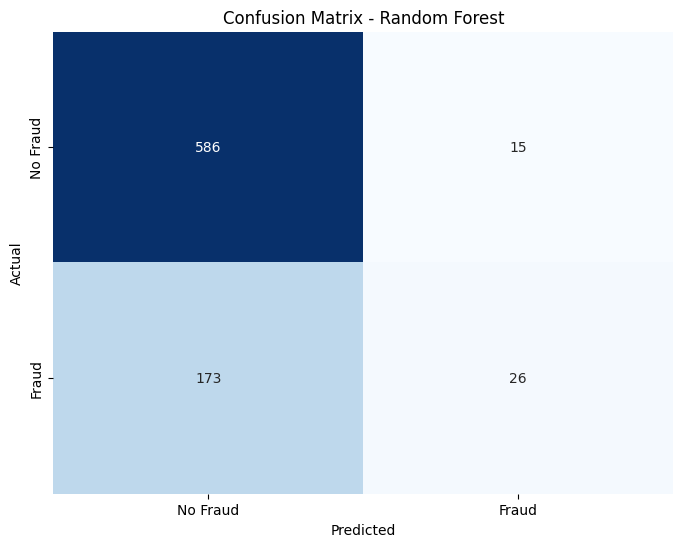

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Fraud', 'Fraud'],
            yticklabels=['No Fraud', 'Fraud'])

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')

# Show the plot
plt.show()

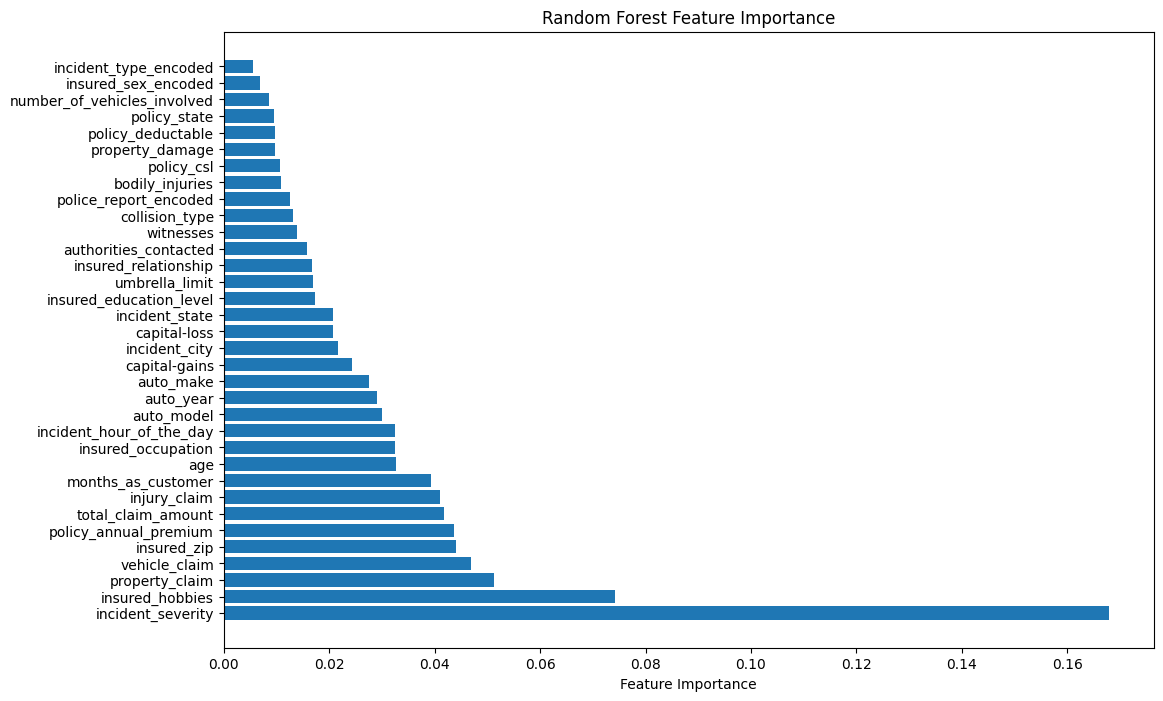

In [6]:
import matplotlib.pyplot as plt

# Create a Random Forest classifier with the best hyperparameters found during tuning
random_forest = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='auto', random_state=42)

# Fit the model on the entire dataset (you can use the training set or the full dataset depending on your preference)
random_forest.fit(X, y)

# Get feature importances
feature_importances = random_forest.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()


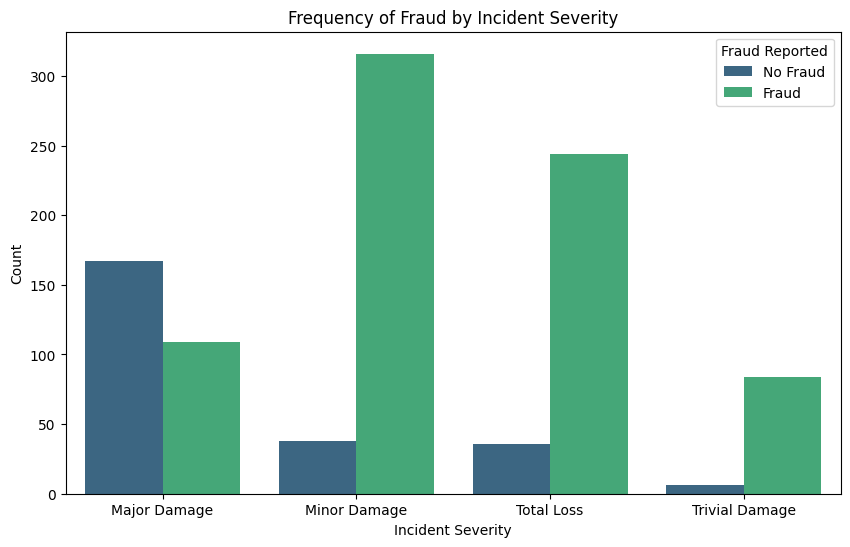

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your original DataFrame with the specified columns

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='incident_severity', hue='fraud_reported', data=df, palette='viridis')

# Set labels and title
plt.xlabel('Incident Severity')
plt.ylabel('Count')
plt.title('Frequency of Fraud by Incident Severity')

# Show legend
plt.legend(title='Fraud Reported', loc='upper right', labels=['No Fraud', 'Fraud'])

# Show the plot
plt.show()